# DAV Mini Project
## Covid-19 Data analysis & Forecasting

## Citation

**Analyzing the epidemiological outbreak of COVID-19: A visual exploratory data analysis approach**

**Authors:** Samrat K Dey, Md Mahbubur Rahman, Umme R Siddiqi, Arpita Howlader

**Journal:** Journal of medical virology

**Volume:** 92

**Number:** 6

**Pages:** 632-638

**Year:** 2020

**Publisher:** Wiley Online Library

[DOI: 10.1002/jmv.25743](https://doi.org/10.1002/jmv.25743)


## Dataset description

Datasets

[Dataset link](https://www.kaggle.com/datasets/brendaso/2019-coronavirus-dataset-01212020-01262020)

The project utilized four primary datasets acquired from Kaggle specifically tailored for Covid-19 Data Analysis & Forecasting. These datasets include:

`covid.csv`: Contains daily case updates, including state-specific case and death counts.
`owid-covid-data.csv`: Offers comprehensive global Covid-19 data by Our World in Data, which includes testing rates and outcomes for various countries, with a focus on the United States for this analysis.
`pop_data.csv`: Provides population data, crucial for calculating per capita statistics and understanding the impact relative to the size of the population.
`recovered.csv`: Tracks the number of recovered Covid-19 patients, essential for assessing recovery rates and outcomes.

Models Used and Parameters

The project leverages Facebook's Prophet model for predictive analysis. Prophet is chosen for its ability to handle the time series data of Covid-19 cases, recognizing trends and seasonality in the dataset. The model's default parameters were primarily used, with specific attention to:

Seasonality: Incorporated to account for weekly and yearly trends observed in the data, acknowledging the cyclic nature of case reports and testing rates.
Change Points: Allowed Prophet to detect points of significant change in the trend, accommodating for sudden increases or decreases in case numbers.

Summary

The analysis embarked on a comprehensive examination of Covid-19's spread across the United States, employing visualizations to depict the proliferation of cases and deaths over time and across different states. It further investigated the testing strategy in the U.S. through daily and cumulative testing figures, alongside the positivity rate and tests per case metrics. Additionally, the study explored the potential political affiliation impact on case rates, differentiating between Democratic and Republican states.

Result and Findings

The analysis of Covid-19's impact and response in the United States yielded several key findings:

**Geographical Variation** : The spread of Covid-19 showed significant variation across states. Visualization tools underscored the virus's progression over time, highlighting states with higher infection rates per capita.

**Testing Analysis**: Examination of testing data revealed fluctuations in daily testing numbers. An observed increase in the positivity rate at certain times suggested periods of heightened virus transmission.

**Predictive Modeling**: Using the Prophet model, the project forecasted future case numbers. This provided insights into potential trends and the effectiveness of ongoing public health measures.

**Political Affiliation Impact** :
The analysis indicates Democratic states have a higher Covid-19 infection rate (0.6%) compared to Republican states (0.44%). This discrepancy could be attributed to several factors:

**Urbanization** : Democratic states often have denser urban populations, facilitating quicker virus spread.
Testing Rates: Increased testing in Democratic states might lead to higher detected case rates.
Policy Responses: Divergent public health policies between states could influence transmission rates.
It's crucial to recognize these findings reflect correlations within the analyzed data and are influenced by complex, multifactorial dynamics, rather than suggesting direct causality.

## Comparative study

## Comparative Analysis of COVID-19 Data Projects

### Scope
- **Our Project:**
  - Focuses on a specific region, forecasting COVID-19's spread.
  - Examines the role of political affiliations in pandemic trajectory.
- **The Reviewed Project:**
  - Offers a global perspective, with emphasis on China.
  - Aims to enhance situational awareness through visual exploratory data analysis (EDA).

### Data Analysis
- **Our Project:**
  - Utilizes predictive modeling, notably the Prophet model.
  - Explores how sociopolitical dynamics influence pandemic patterns.
- **The Reviewed Project:**
  - Relies on visual EDA to map pandemic spread.
  - Prioritizes data clarity through visual representations.

### Findings
- **Our Project:**
  - Illuminates forthcoming pandemic trends.
  - Scrutinizes pandemic spread within political landscapes.
- **The Reviewed Project:**
  - Highlights geographical and chronological spread, particularly in Hubei province.
  - Examines global ramifications of COVID-19 outbreak.

### Contributions
- **Our Project:**
  - Offers predictive insights into pandemic's future course.
  - Examines nuanced impact of political factors.
- **The Reviewed Project:**
  - Makes epidemiological data accessible and interpretable through visual means.
  - Supports early containment efforts.

### Summary
While both projects aim to analyze COVID-19 data, ours leans towards predictive analysis and examination of political affiliations. In contrast, the reviewed project focuses on visually presenting early-stage pandemic data, particularly emphasizing the initial outbreak period.


## Implementation

In [ ]:
!gdown --id 1zsWysPCm6AWls0K4tA-2rVLgohO2g8NQ

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zsWysPCm6AWls0K4tA-2rVLgohO2g8NQ
To: /content/archive.zip
100% 938k/938k [00:00<00:00, 103MB/s]


In [ ]:
!mkdir data
!unzip archive.zip -d data

Archive:  archive.zip
  inflating: data/covid.csv          
  inflating: data/owid-covid-data.csv  
  inflating: data/pop_data.csv       
  inflating: data/recovered.csv      


In [ ]:
%%capture
!pip install prophet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import warnings
# warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px
from datetime import datetime as dt
from datetime import timedelta
#from pytrends.request import TrendReq
from prophet import Prophet

In [ ]:
# get data
data = pd.read_csv(r'data/covid.csv', error_bad_lines = False)

recovered = pd.read_csv(r'data/recovered.csv', error_bad_lines = False)
recovered.columns = ['date', 'Recovered']
recovered.index = pd.to_datetime(recovered['date'])
recovered = recovered['Recovered'].astype('int64')


<ipython-input-17-7e213232686d>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(r'data/covid.csv', error_bad_lines = False)
<ipython-input-17-7e213232686d>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  recovered = pd.read_csv(r'data/recovered.csv', error_bad_lines = False)


date
2020-01-22          0
2020-01-23          0
2020-01-24          0
2020-01-25          0
2020-01-26          0
               ...   
2020-08-04    1528979
2020-08-05    1577851
2020-08-06    1598624
2020-08-07    1623870
2020-08-08    1643118
Name: Recovered, Length: 200, dtype: int64

In [ ]:
data

,Unnamed: 0,date,state,fips,cases,deaths
0,0,2020-01-21,Washington,53,1,0
1,1,2020-01-22,Washington,53,1,0
2,2,2020-01-23,Washington,53,1,0
3,3,2020-01-24,Illinois,17,1,0
4,4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...,...
8754,8754,2020-08-08,Virginia,51,99189,2322
8755,8755,2020-08-08,Washington,53,64347,1752
8756,8756,2020-08-08,West Virginia,54,7563,131
8757,8757,2020-08-08,Wisconsin,55,64231,1007


In [ ]:
# clean dataframes
data.drop('Unnamed: 0',axis = 1, inplace = True)

In [ ]:

cases = data[['date', 'state', 'cases', 'deaths']]

In [ ]:
us_states = {
        'Alaska': 'AK',
        'Alabama': 'AL',
        'Arkansas': 'AR',
        'American Somoa': 'AS',
        'Arizona': 'AZ',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'District of Colombia': 'DC',
        'Delaware': 'DE',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Iowa': 'IA',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Massachusetts': 'MA',
        'Maryland': 'MD',
        'Maine': 'ME',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Missouri': 'MO',
        'Mississippi': 'MS',
        'Montana': 'MT',
        'National': 'NA',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Nebraska': 'NE',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'Nevada': 'NV',
        'New York': 'NY',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Puerto Rico': 'PR',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Virginia': 'VA',
        'Virgin Islands': 'VI',
        'Vermont': 'VT',
        'Washington': 'WA',
        'Wisconsin': 'WI',
        'West Virginia': 'WV',
        'Wyoming': 'WY'
}

In [ ]:
cases['abbrev'] = cases['state'].map(us_states).fillna(cases['state'])
cases

,date,state,cases,deaths,abbrev
0,2020-01-21,Washington,1,0,WA
1,2020-01-22,Washington,1,0,WA
2,2020-01-23,Washington,1,0,WA
3,2020-01-24,Illinois,1,0,IL
4,2020-01-24,Washington,1,0,WA
...,...,...,...,...,...
8754,2020-08-08,Virginia,99189,2322,VA
8755,2020-08-08,Washington,64347,1752,WA
8756,2020-08-08,West Virginia,7563,131,WV
8757,2020-08-08,Wisconsin,64231,1007,WI



Great, we have added abbreviations to the dataframe. We will keep the state name for ease of use when merging another dataframe. Now we can plot a geographical visual that tells us the prevalence of cases in each state over a certain time period.

In [ ]:

fig = px.choropleth(cases,
                   locations='abbrev',
                   color='cases',
                   hover_name = 'abbrev',
                   locationmode = 'USA-states',
                   animation_frame = 'date')

fig.update_layout(
title_text = 'Spread of Covid-19 in the United States',
title_x = 0.5,
geo_scope = 'usa',
geo=dict(
showframe = False,
showcoastlines = False))

fig.show()

We can see the severity of cases as the virus spreads across the United States with the above visual. However, a more helpful statistic will be to measure the virus spread versus the population for each state. Then we can get a more accurate estimate of the significance it holds in each state.

In [ ]:
pop_data = pd.read_csv(r'data/pop_data.csv')

In [ ]:
#merge population to dataframe.
cases = cases.merge(pop_data,
          how = 'left',
          left_on = 'state',
          right_on = 'state')
cases

,date,state,cases,deaths,abbrev,Unnamed: 0,population
0,2020-01-21,Washington,1,0,WA,12.0,7614893.0
1,2020-01-22,Washington,1,0,WA,12.0,7614893.0
2,2020-01-23,Washington,1,0,WA,12.0,7614893.0
3,2020-01-24,Illinois,1,0,IL,4.0,12671821.0
4,2020-01-24,Washington,1,0,WA,12.0,7614893.0
...,...,...,...,...,...,...,...
8754,2020-08-08,Virginia,99189,2322,VA,11.0,8535519.0
8755,2020-08-08,Washington,64347,1752,WA,12.0,7614893.0
8756,2020-08-08,West Virginia,7563,131,WV,37.0,1792147.0
8757,2020-08-08,Wisconsin,64231,1007,WI,19.0,5822434.0


Now that we have a more complete dataframe we will create another visual to account for the severity of cases in each state. To do this we will use the same as above for simplicity. First, we must determine a rolling percentage of cases in each state so that we can determine the severity of the virus.

In [ ]:
#creating percentage column in dataframe.
cases['percent'] = cases['cases'] / cases['population'] * 100

In [ ]:
fig = px.choropleth(cases,
                   locations='abbrev',
                   color='percent',
                   hover_name = 'abbrev',
                   locationmode = 'USA-states',
                   animation_frame = 'date')

fig.update_layout(
title_text = 'Spread of Covid-19 in the United States (%)',
title_x = 0.5,
geo_scope = 'usa',
geo=dict(
showframe = False,
showcoastlines = False))

fig.show()

In recent months, the percent of population with the virus has increased dramatically. Some states now have over the 2.5% threshold. Yet, New York has managed to minimize the amount of cases despite having a surge of cases early on in the virus.

In [ ]:
sorted_cases = cases.sort_values('cases', ascending=False)
state_max_cases = sorted_cases.drop_duplicates('state')
state_max_cases.drop('abbrev', axis=1, inplace=True)

<ipython-input-29-ef39a34b3ef9>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#top 10 states with most cases.
cases_top10 = state_max_cases.nlargest(10, 'cases')

#top 10 states with highest severity of cases.
percent_top10 = state_max_cases.nlargest(10, 'percent')

<Axes: title={'center': 'Top 10 States with Highest Severity'}, xlabel='percent', ylabel='state'>

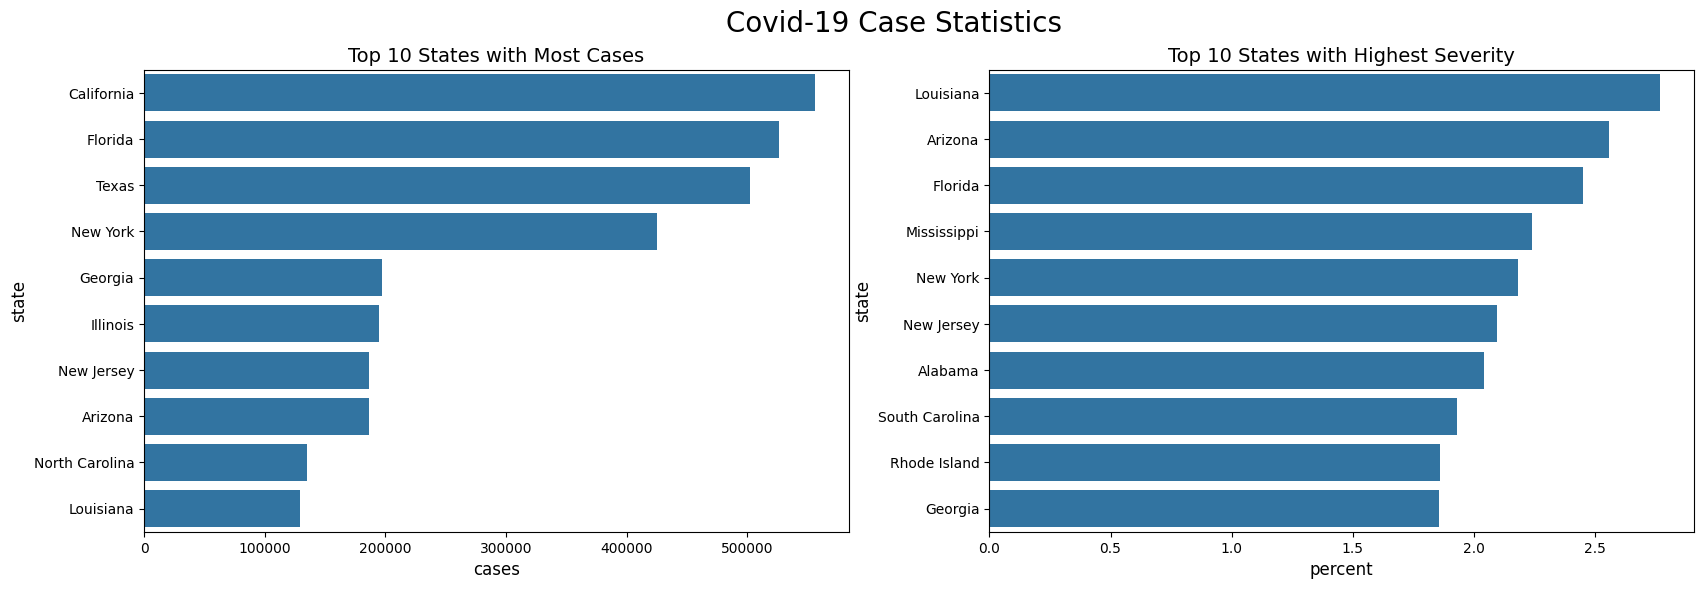

In [ ]:

fig, axes = plt.subplots(1, 2, sharex = False, sharey = False, figsize = (20,6))
fig.suptitle("Covid-19 Case Statistics", fontsize = 20)
axes[0].set_title('Top 10 States with Most Cases', fontsize = 14)
axes[0].set_xlabel('cases', fontsize = 12)
axes[0].set_ylabel('state', fontsize = 12)
axes[1].set_title('Top 10 States with Highest Severity', fontsize = 14)
axes[1].set_xlabel('percent', fontsize = 12)
axes[1].set_ylabel('state', fontsize = 12)

sns.barplot(ax = axes[0], data = cases_top10,
            y = 'state',
            x = 'cases')

sns.barplot(ax = axes[1], data = percent_top10,
            y = 'state',
            x = 'percent')

Text(0.5, 1.0, 'Statewide Covid-19 Cases')

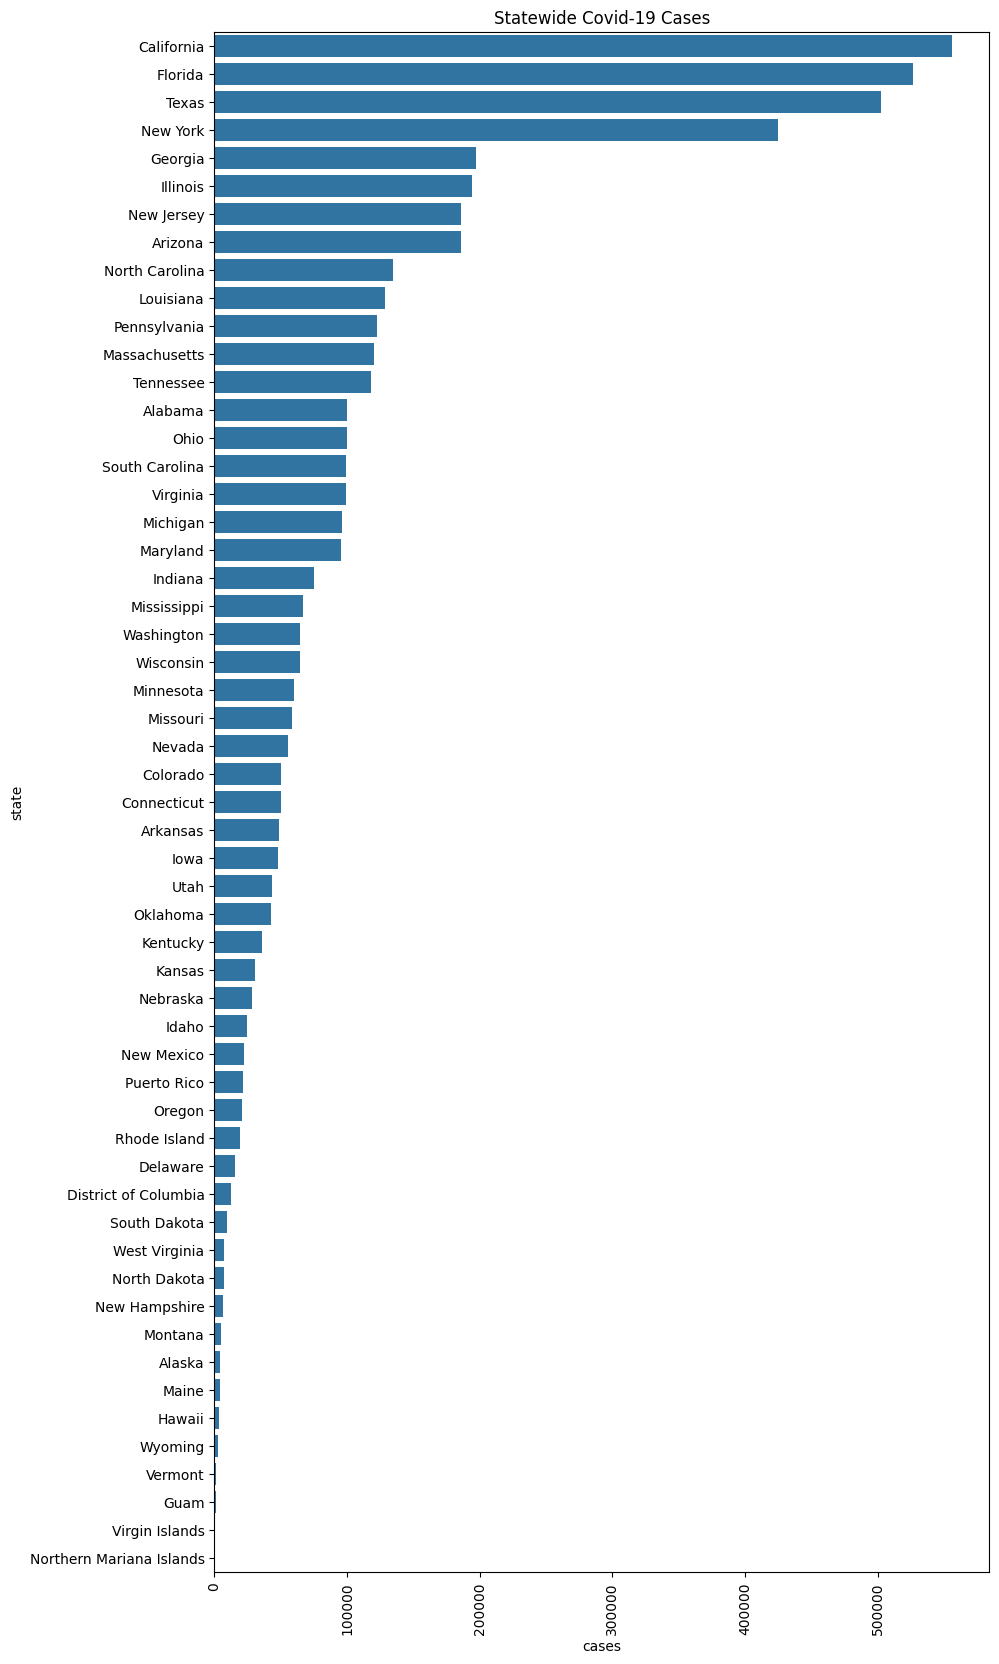

In [ ]:
#add countplot.
fig, ax = plt.subplots(ncols=1, sharey = False, figsize = (10,20))
plt.xticks(rotation=90)
sns.barplot(y = state_max_cases['state'], x = state_max_cases['cases']).set_title('Statewide Covid-19 Cases')

In [ ]:
#death rate.
percent_deaths = cases['deaths'] / cases['population'] * 100
cases['death rate'] = percent_deaths

In [ ]:
#choro map
fig = px.choropleth(cases,
                   locations='abbrev',
                   color='deaths',
                   hover_name = 'abbrev',
                   locationmode = 'USA-states',
                   animation_frame = 'date')

fig.update_layout(
title_text = 'Covid-19 Deaths in the United States',
title_x = 0.5,
geo_scope = 'usa',
geo=dict(
showframe = False,
showcoastlines = False))

fig.show()

In [ ]:
sorted_deaths = cases.sort_values('deaths', ascending = False)
state_max_deaths = sorted_deaths.drop_duplicates('state')
state_max_deaths.drop('abbrev', axis=1, inplace=True)

<ipython-input-36-6e5eb215e2e2>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#top 10 states with most deaths.
deaths_top10 = state_max_deaths.nlargest(10, 'deaths')

#top 10 states with highest death rate.
death_ratetop10 = state_max_deaths.nlargest(10, 'death rate')

<Axes: title={'center': 'Top 10 States with Highest Severity'}, xlabel='percent', ylabel='state'>

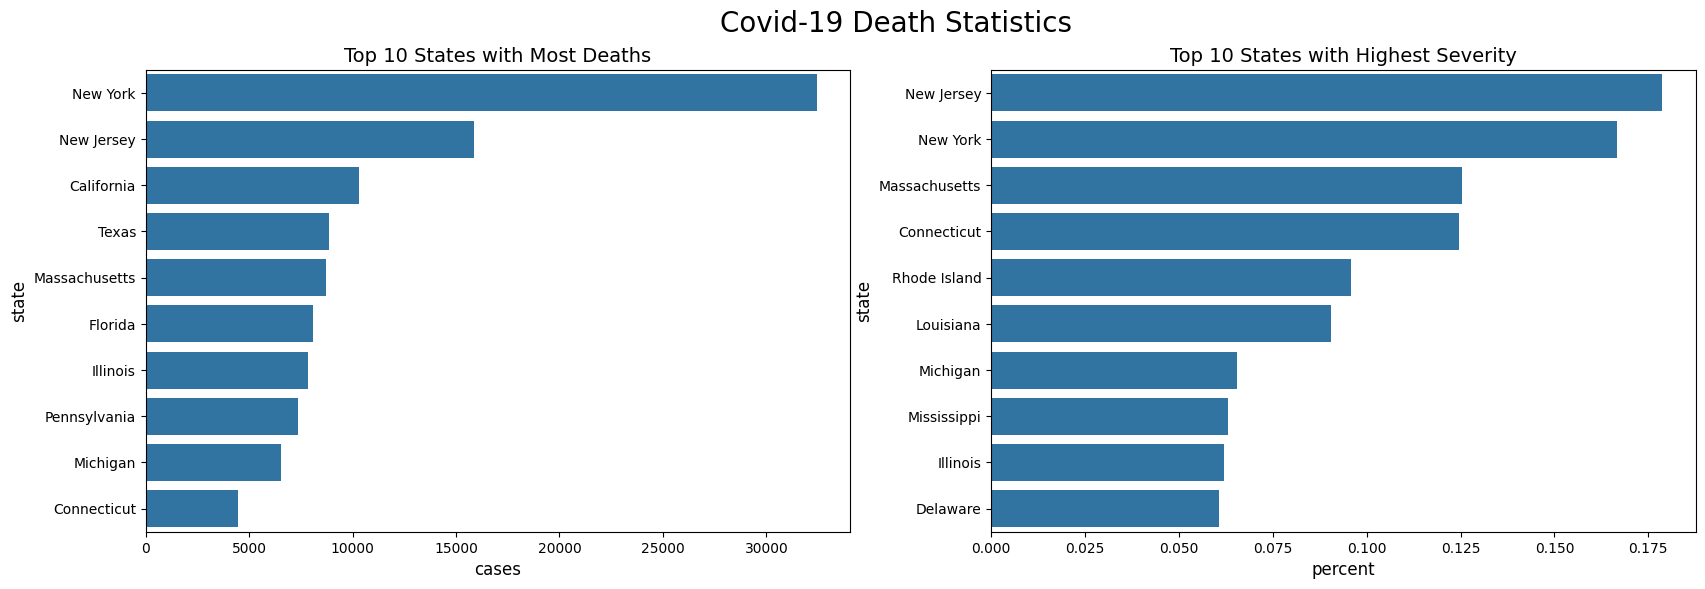

In [ ]:
fig, axes = plt.subplots(1, 2, sharex = False, sharey = False, figsize = (20,6))
fig.suptitle("Covid-19 Death Statistics", fontsize = 20)
axes[0].set_title('Top 10 States with Most Deaths', fontsize = 14)
axes[0].set_xlabel('cases', fontsize = 12)
axes[0].set_ylabel('state', fontsize = 12)
axes[1].set_title('Top 10 States with Highest Severity', fontsize = 14)
axes[1].set_xlabel('percent', fontsize = 12)
axes[1].set_ylabel('state', fontsize = 12)

sns.barplot(ax = axes[0], data = deaths_top10,
            y = 'state',
            x = 'deaths')

sns.barplot(ax = axes[1], data = death_ratetop10,
            y = 'state',
            x = 'death rate')

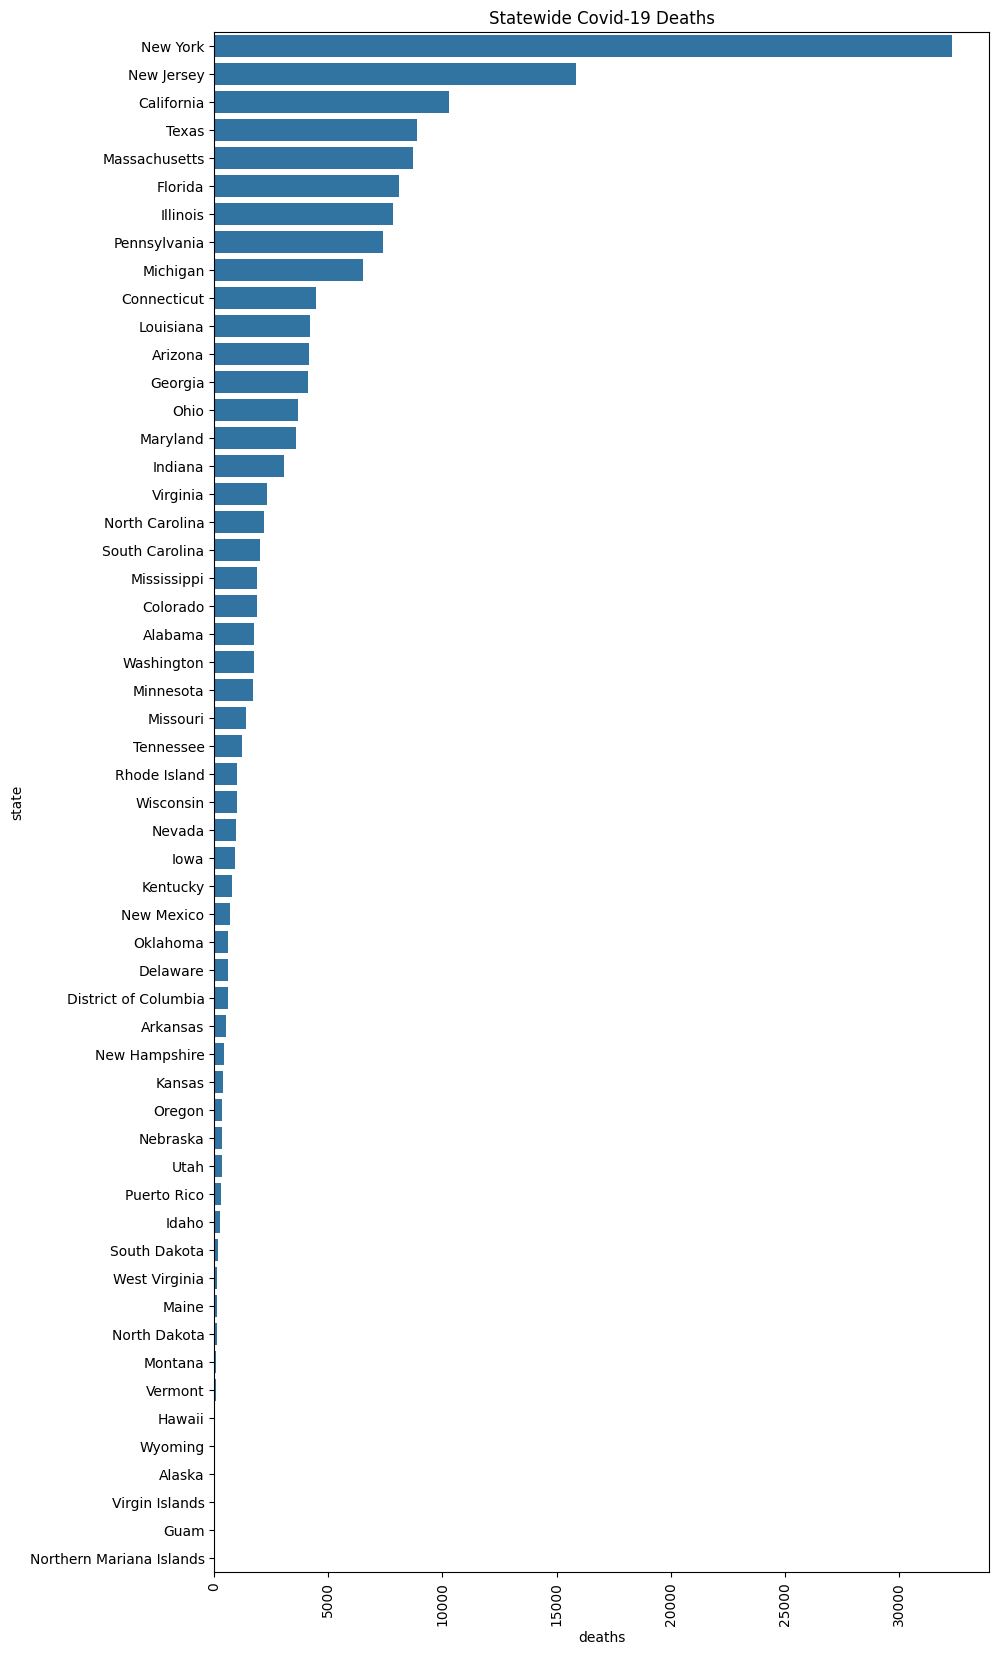

In [ ]:
#add countplot.
fig, ax = plt.subplots(ncols=1, sharey = False, figsize = (10,20))
plt.xticks(rotation=90)
sortedDeaths = state_max_cases.sort_values(by = ['deaths'], ascending = False)
sns.barplot(y = sortedDeaths['state'], x = sortedDeaths['deaths']).set_title('Statewide Covid-19 Deaths')

In [ ]:

date_deaths = data[['date', 'deaths']]
deaths_by_date = date_deaths.groupby('date')['deaths'].sum()

date_cases = data[['date', 'cases']]
cases_by_date = date_cases.groupby('date')['cases'].sum()

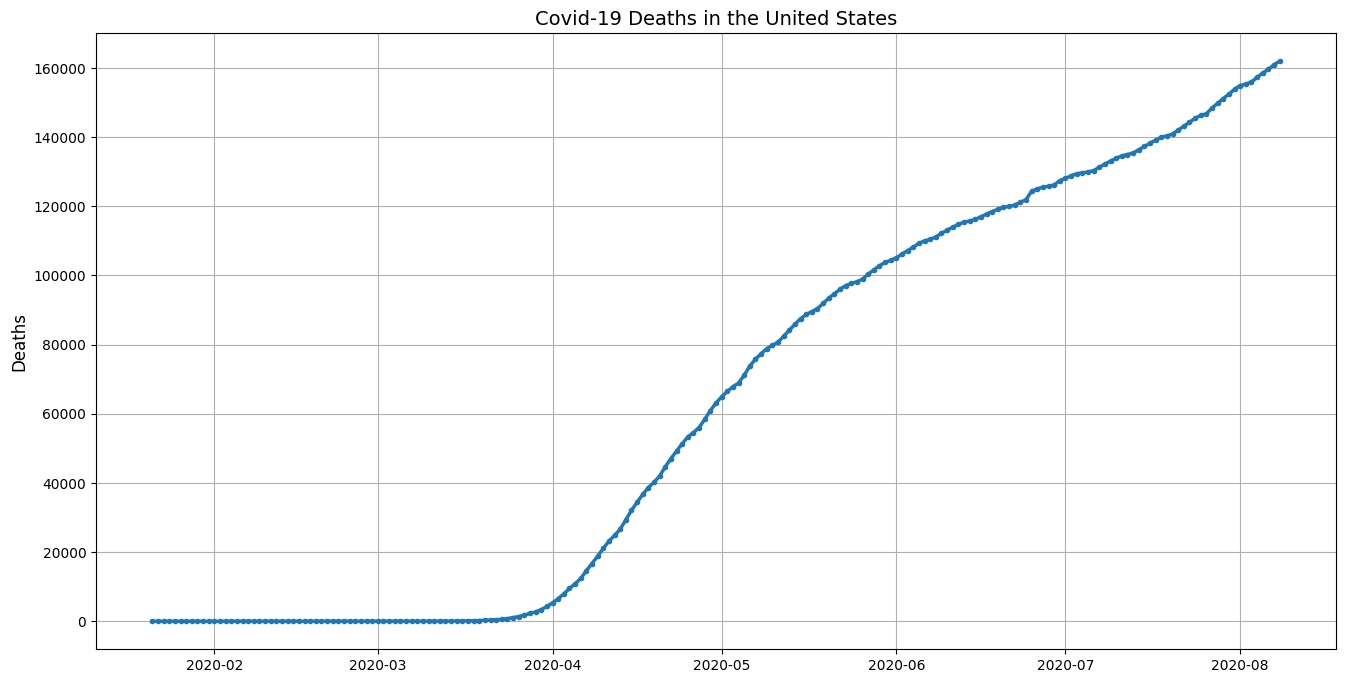

In [ ]:

deaths_by_date.index = pd.to_datetime(deaths_by_date.index)
months = mdates.MonthLocator()

#plot deaths over time.
fig, ax = plt.subplots(figsize = (16,8))
marker_style = dict(linewidth=2.5, linestyle = '-', marker = 'o', markersize = 3)
ax.plot(deaths_by_date, **marker_style)
plt.ylabel("Deaths", fontsize = 12)
plt.title('Covid-19 Deaths in the United States', fontsize = 14)

#format ticks
ax.xaxis.set_major_locator(months)
ax.grid(True)

plt.show()

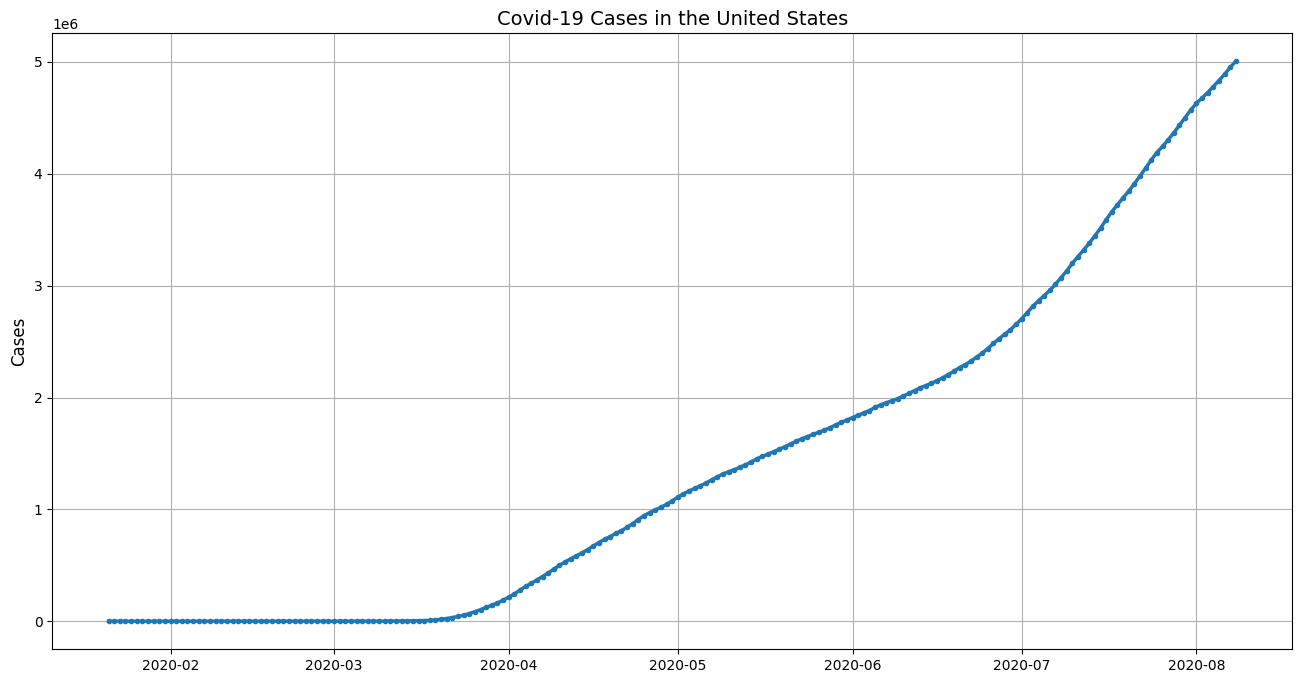

In [ ]:

cases_by_date.index = pd.to_datetime(cases_by_date.index)

#plot cases over time.
fig, ax = plt.subplots(figsize = (16,8))
marker_style = dict(linewidth=2.5, linestyle = '-', marker = 'o', markersize = 3)
ax.plot(cases_by_date, **marker_style)
plt.ylabel('Cases', fontsize = 12)
plt.title('Covid-19 Cases in the United States', fontsize = 14)

#formatting
ax.xaxis.set_major_locator(months)
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x
ax.grid(True)

plt.show()

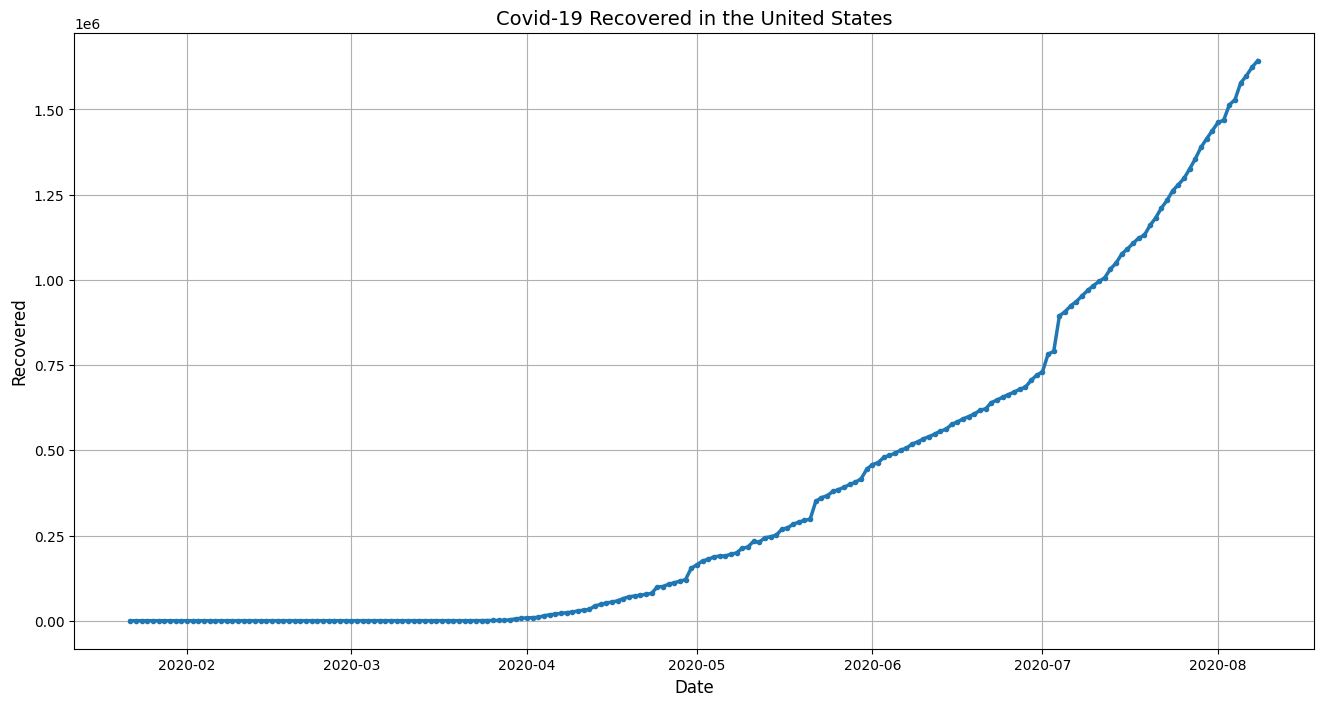

In [ ]:
recovered_by_date = pd.DataFrame(recovered)
recovered_by_date.index = pd.to_datetime(recovered_by_date.index)

#plot cases over time.
fig, ax = plt.subplots(figsize = (16,8))
marker_style = dict(linewidth=2.5, linestyle = '-', marker = 'o', markersize = 3)
ax.plot(recovered_by_date, **marker_style)
plt.ylabel('Recovered', fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.title('Covid-19 Recovered in the United States', fontsize = 14)

#formatting
ax.xaxis.set_major_locator(months)
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x
ax.grid(True)

plt.show()

In [ ]:
#create cleaned dataframe for plot.
recovered.index = pd.to_datetime(recovered.index)
plot_df = pd.DataFrame(cases_by_date)


labels = ['deaths', 'recovered']
dfs = [deaths_by_date, recovered]
i=0
for label in labels:
    plot_df[label] = pd.DataFrame(dfs[i])
    i+=1
plot_df

,cases,deaths,recovered
date,,,
2020-01-21,1,0,NaN
2020-01-22,1,0,0.0
2020-01-23,1,0,0.0
2020-01-24,2,0,0.0
2020-01-25,3,0,0.0
...,...,...,...
2020-08-04,4778669,157299,1528979.0
2020-08-05,4832395,158552,1577851.0
2020-08-06,4889733,159623,1598624.0


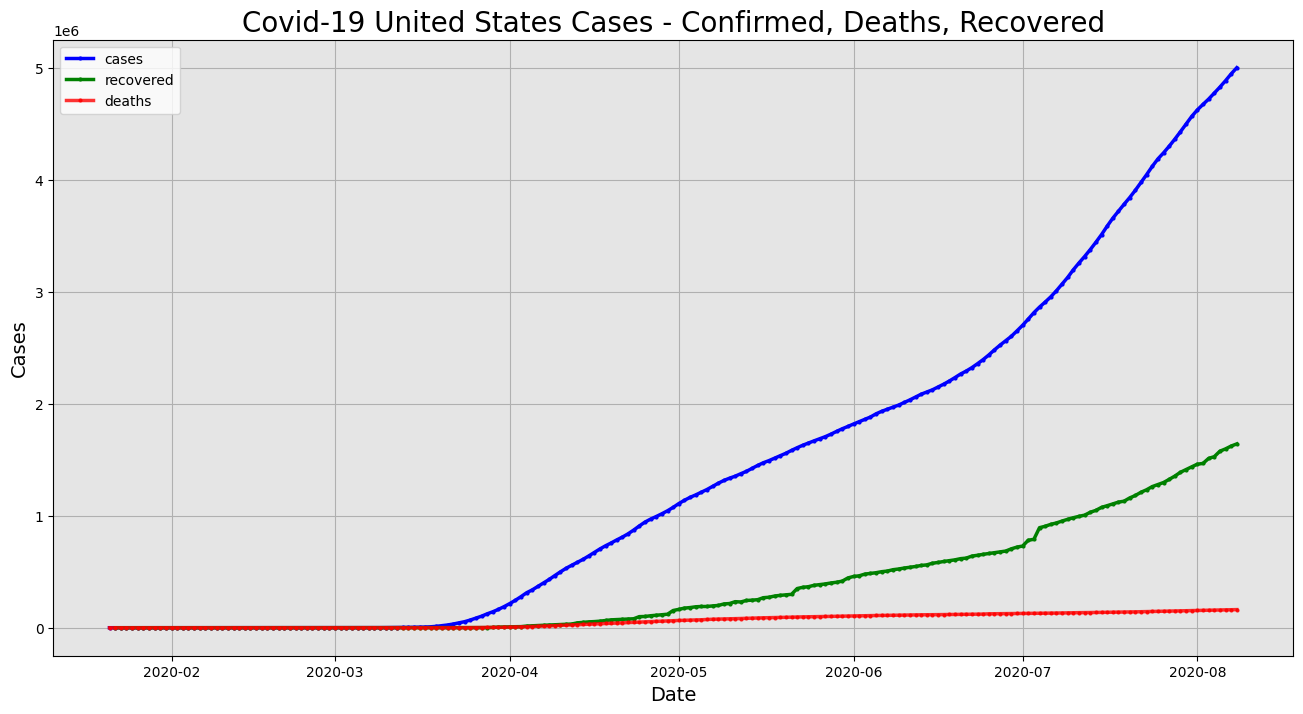

In [ ]:
#plot.
fig, ax = plt.subplots(1, figsize = (16,8))

plt.plot(plot_df['cases'], label = 'cases', color = 'blue', linewidth = 2.5, marker = 'o', markersize = 2)
plt.plot(plot_df['recovered'], label = 'recovered', color = 'green', linewidth = 2.5, marker = 'o', markersize = 2)
plt.plot(plot_df['deaths'], label = 'deaths', color = 'red', linewidth = 2.5, marker = 'o', markersize = 2, alpha = 0.8)


#labels
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Cases', fontsize = 14)
plt.title('Covid-19 United States Cases - Confirmed, Deaths, Recovered', fontsize = 20)
plt.legend()

#formatting
ax.xaxis.set_major_locator(months)
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x
ax.grid(True)
ax.patch.set_facecolor('grey') #chance background color if needed.
ax.patch.set_alpha(0.2)

In [ ]:

#states affected over time.
states_affected = []
cases_date = cases[['cases', 'date','state']]
for i, row in cases_date.iterrows():
    if row['cases'] != 0:
        states_affected.append(row)
states_affected = pd.DataFrame(states_affected)

In [ ]:
#first 10 States to contract covid-19.
sorted_dates = states_affected.sort_values('date', ascending = True)
sorted_uniq_dates = sorted_dates.drop_duplicates('state')
sorted_uniq_dates.head(10)

,cases,date,state
0,1,2020-01-21,Washington
3,1,2020-01-24,Illinois
5,1,2020-01-25,California
8,1,2020-01-26,Arizona
35,1,2020-02-01,Massachusetts
57,1,2020-02-05,Wisconsin
98,1,2020-02-12,Texas
133,10,2020-02-17,Nebraska
199,1,2020-02-25,Utah
225,1,2020-02-28,Oregon


<ipython-input-48-7bd29661a3f2>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



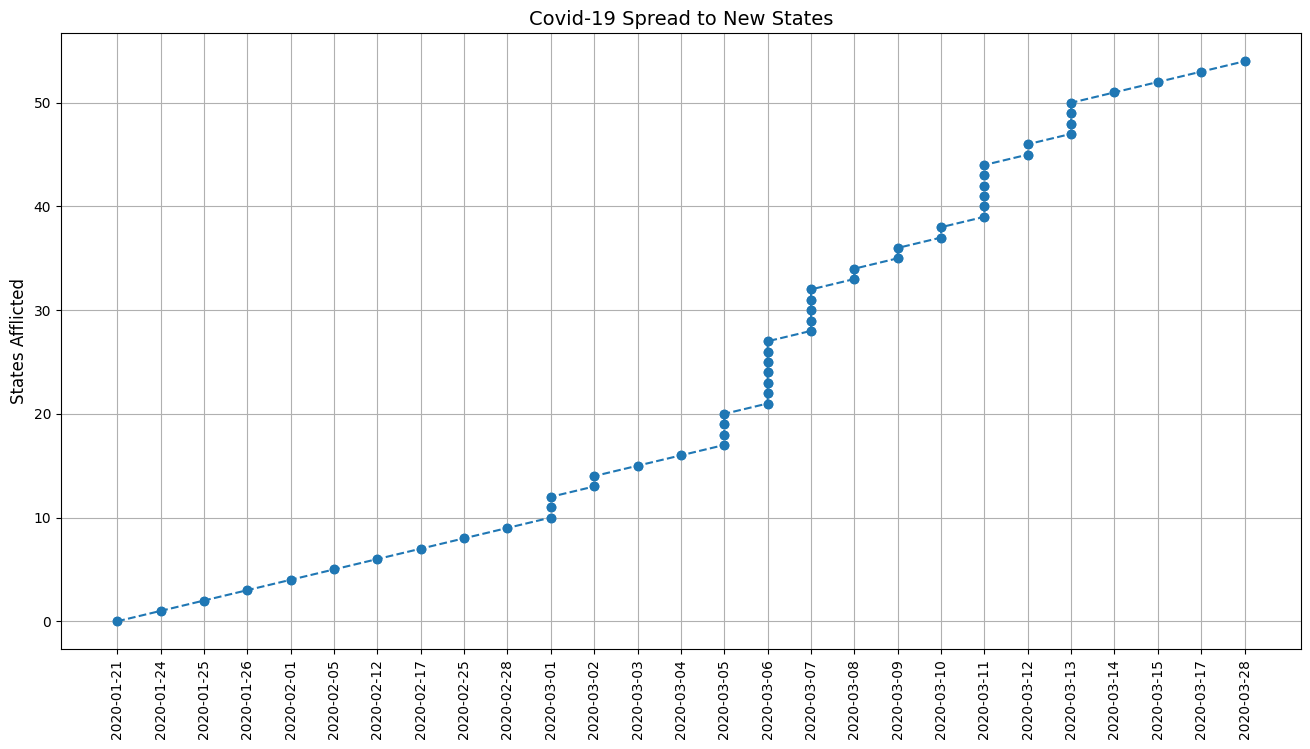

In [ ]:
#spread of Covid-19 to New States.
state_counts = []
for i in range(0, len(sorted_uniq_dates)):
    state_counts.append(i)

sorted_uniq_dates['count'] = state_counts

plt.figure(figsize = (16,8))
plt.scatter(x = sorted_uniq_dates['date'], y = sorted_uniq_dates['count'])
plt.plot(sorted_uniq_dates['date'], sorted_uniq_dates['count'], 'o--')
plt.xticks(rotation=90)
plt.title('Covid-19 Spread to New States', fontsize = 14)
plt.ylabel('States Afflicted', fontsize = 12)
plt.grid(True)

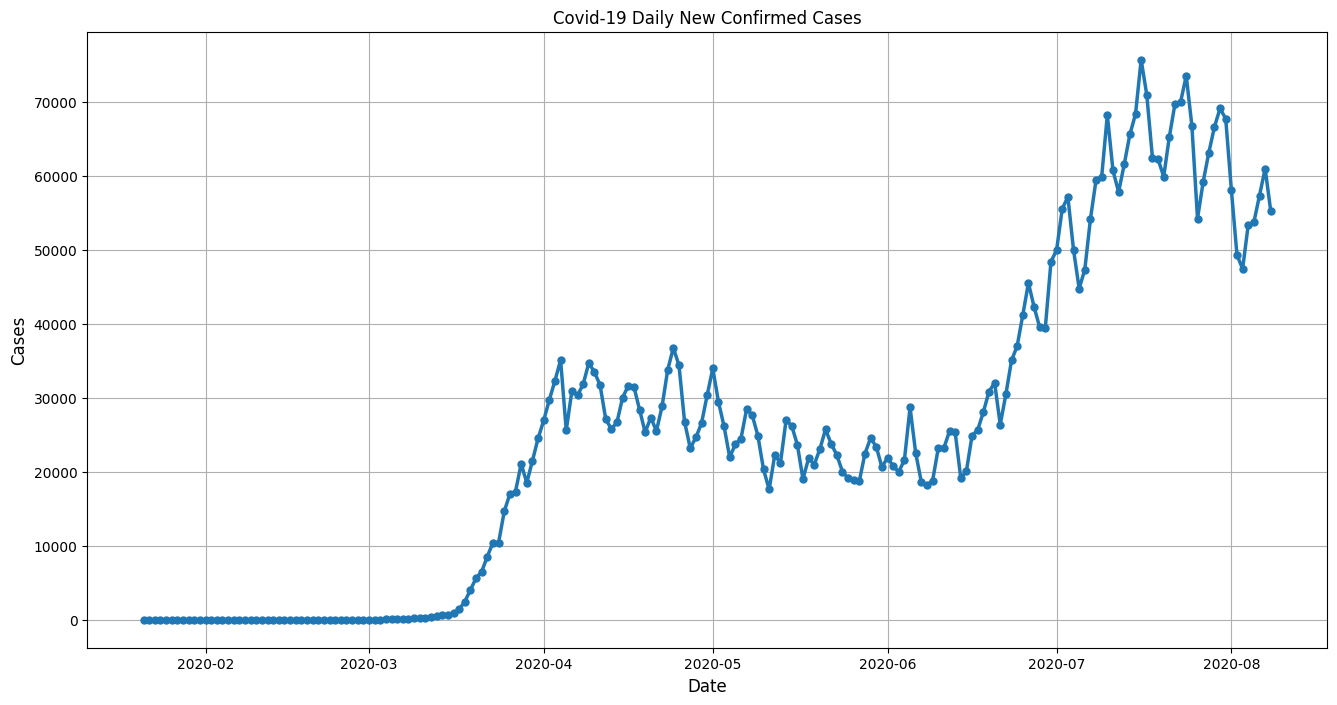

In [ ]:
cases_by_date.index = pd.to_datetime(cases_by_date.index)

#covid-19 daily new confirmed cases.
difference = cases_by_date.diff()
difference = difference.fillna(0)
fig, ax = plt.subplots(figsize = (16,8))

marker_style = dict(linewidth=2.5, linestyle = '-', marker = 'o', markersize = 5)
ax.plot(difference, **marker_style)

#labels
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Cases', fontsize = 12)
plt.title('Covid-19 Daily New Confirmed Cases')

#formatting
ax.xaxis.set_major_locator(months)
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x
ax.grid(True)

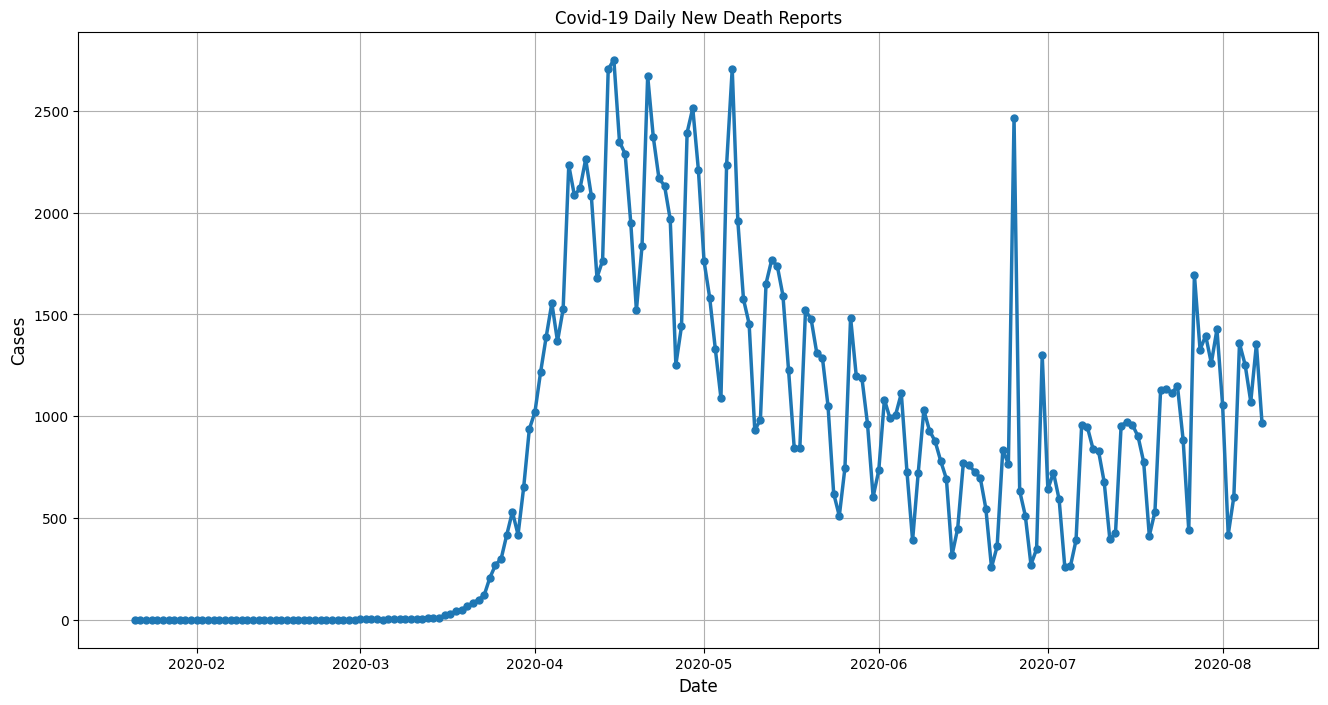

In [ ]:
difference = deaths_by_date.diff()
difference = difference.fillna(0)
fig, ax = plt.subplots(figsize = (16,8))


marker_style = dict(linewidth=2.5, linestyle = '-', marker = 'o', markersize = 5)
ax.plot(difference, **marker_style)

#labels
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Cases', fontsize = 12)
plt.title('Covid-19 Daily New Death Reports')

#formatting
ax.xaxis.set_major_locator(months)
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x
ax.grid(True)

In [ ]:
#prepare data.
data = data.merge(pop_data,
          how = 'left',
          left_on = 'state',
          right_on = 'state')

In [ ]:
democratic = ['Washington', 'Oregon', 'Nevada', 'California', 'Colorado', 'New Mexico', 'Illinois', 'Minnesota', 'Virginia',
             'Maine', 'New York', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New Jersey',
             'Deleware', 'Maryland', 'Washington D.C.', 'Hawaii']

republican = ['Idaho', 'Montana', 'Utah', 'Arizona', 'Wyoming' ,'Texas', 'North Dakota', 'South Dakota', 'Nebraska',
             'Kansas', 'Oklahoma', 'Iowa', 'Missouri', 'Arkansas', 'Lousiana', 'Wisconsin' ,'Michigan', 'Indiana', 'Kentucky',
             'Tennessee', 'Alabama', 'Georgia', 'Florida', 'South Carolina', 'North Carolina', 'Ohio', 'West Virgina',
             'Pennsylvania', 'Alaska']

#initialize empty column.
data['political status'] = np.nan

#create dummy variables.
for i, state in enumerate(data['state']):
    if state in democratic:
        data.at[i,'political status'] = 0
    else:
        data.at[i, 'political status'] = 1

In [ ]:
#percents
democratic_cases = data[data['political status'] == 0]['cases'].sum()
republican_cases = data[data['political status'] == 1]['cases'].sum()

democratic_pop = data[data['political status'] == 0]['population'].sum()
republican_pop = data[data['political status'] == 1]['population'].sum()

democratic_case_percent = democratic_cases / democratic_pop * 100
republican_case_percent = republican_cases / republican_pop * 100

political_affiliation = pd.DataFrame({'Democratic': [democratic_case_percent],
                                     'Republican': [republican_case_percent]})
political_affiliation

,Democratic,Republican
0,0.600954,0.437555


On average, a Democratic state will have 0.6% of the state population infected with Covid-19 while Republican states have slightly lower at 0.44%. Keep in mind that this statistic has a lot of variance and therefore no conclusions can be made, yet it is interesting to look at. I suggest that this variance is due to the disparity of urbanized vs ruralized areas.

### Testing in the United States

In [ ]:
#coronavirus testing.
data_owid = pd.read_csv(r'data/owid-covid-data.csv')
united_states = data_owid['location'] == 'United States'
us_df = data_owid[united_states]
testing = us_df[['date', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'positive_rate', 'tests_per_case']]
testing = testing.fillna(0)

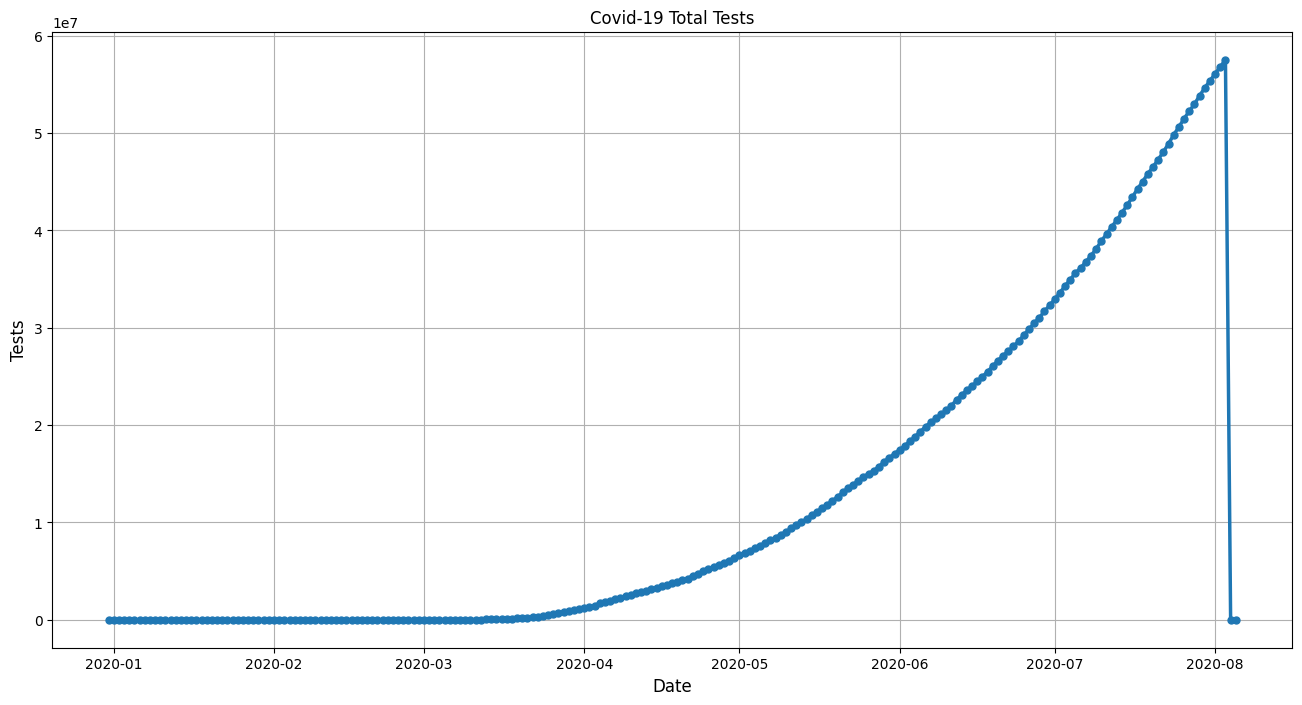

In [ ]:
testing['date'] = pd.to_datetime(testing['date'])

fig, ax = plt.subplots(figsize = (16,8))


marker_style = dict(linewidth=2.5, linestyle = '-', marker = 'o', markersize = 5)
ax.plot(testing['date'], testing['total_tests'], **marker_style)

#Labels
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Tests', fontsize = 12)
plt.title('Covid-19 Total Tests')

#Formatting
ax.xaxis.set_major_locator(months)
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x
ax.grid(True)

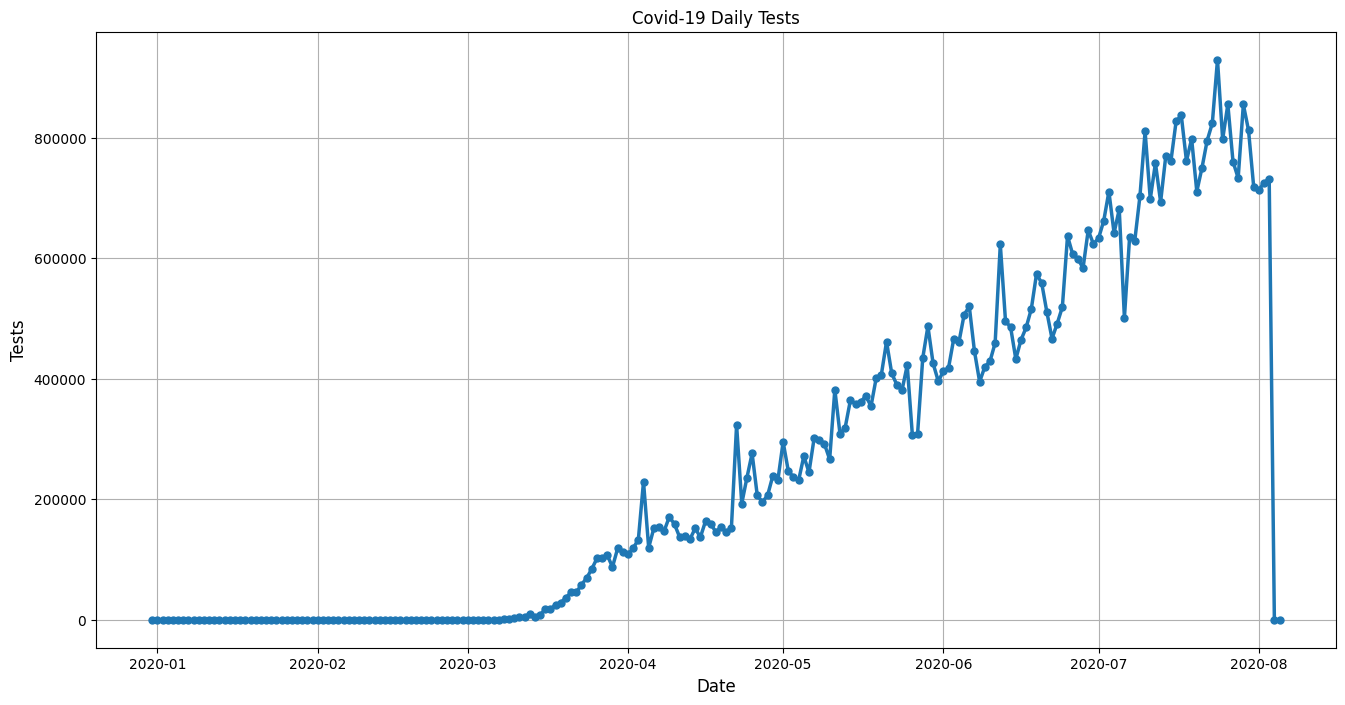

In [ ]:
fig, ax = plt.subplots(figsize = (16,8))


marker_style = dict(linewidth=2.5, linestyle = '-', marker = 'o', markersize = 5)
ax.plot(testing['date'], testing['new_tests'], **marker_style)

#labels
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Tests', fontsize = 12)
plt.title('Covid-19 Daily Tests')

#formatting
ax.xaxis.set_major_locator(months)
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x
ax.grid(True)

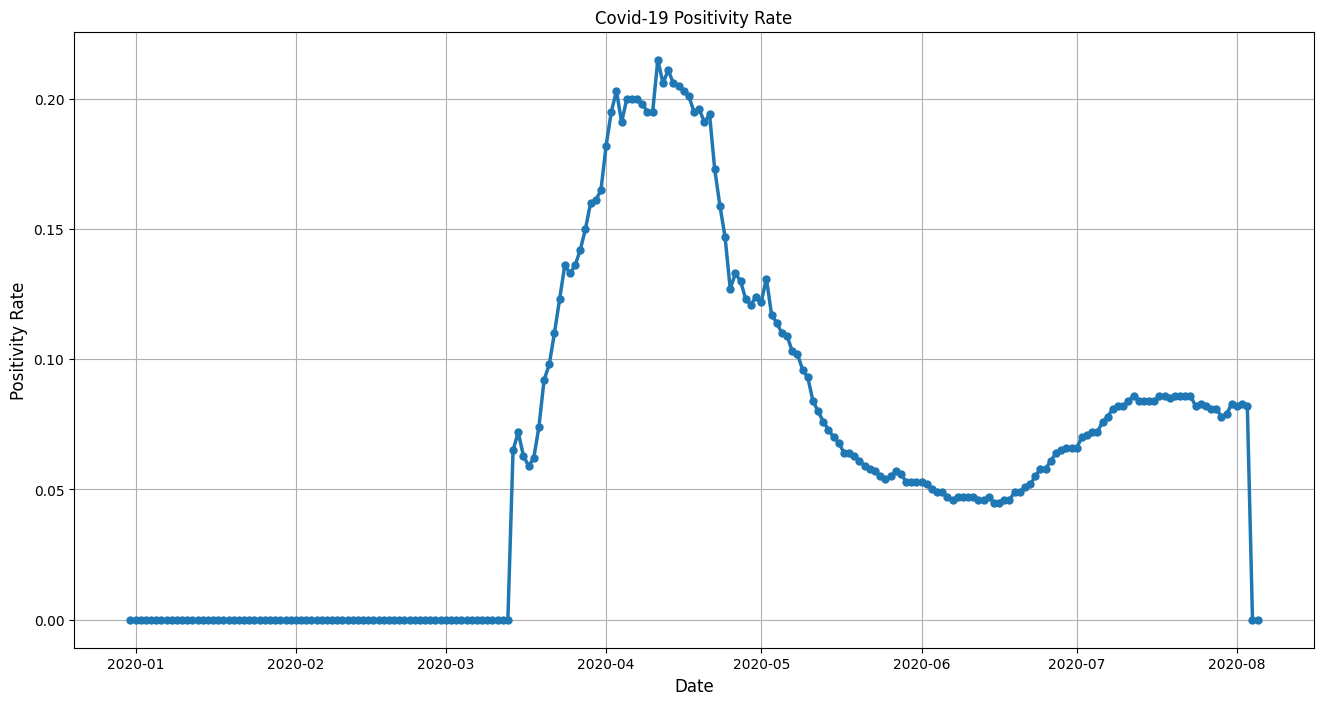

In [ ]:
fig, ax = plt.subplots(figsize = (16,8))


marker_style = dict(linewidth=2.5, linestyle = '-', marker = 'o', markersize = 5)
ax.plot(testing['date'], testing['positive_rate'], **marker_style)

#labels
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Positivity Rate', fontsize = 12)
plt.title('Covid-19 Positivity Rate')

#formatting
ax.xaxis.set_major_locator(months)
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x
ax.grid(True)

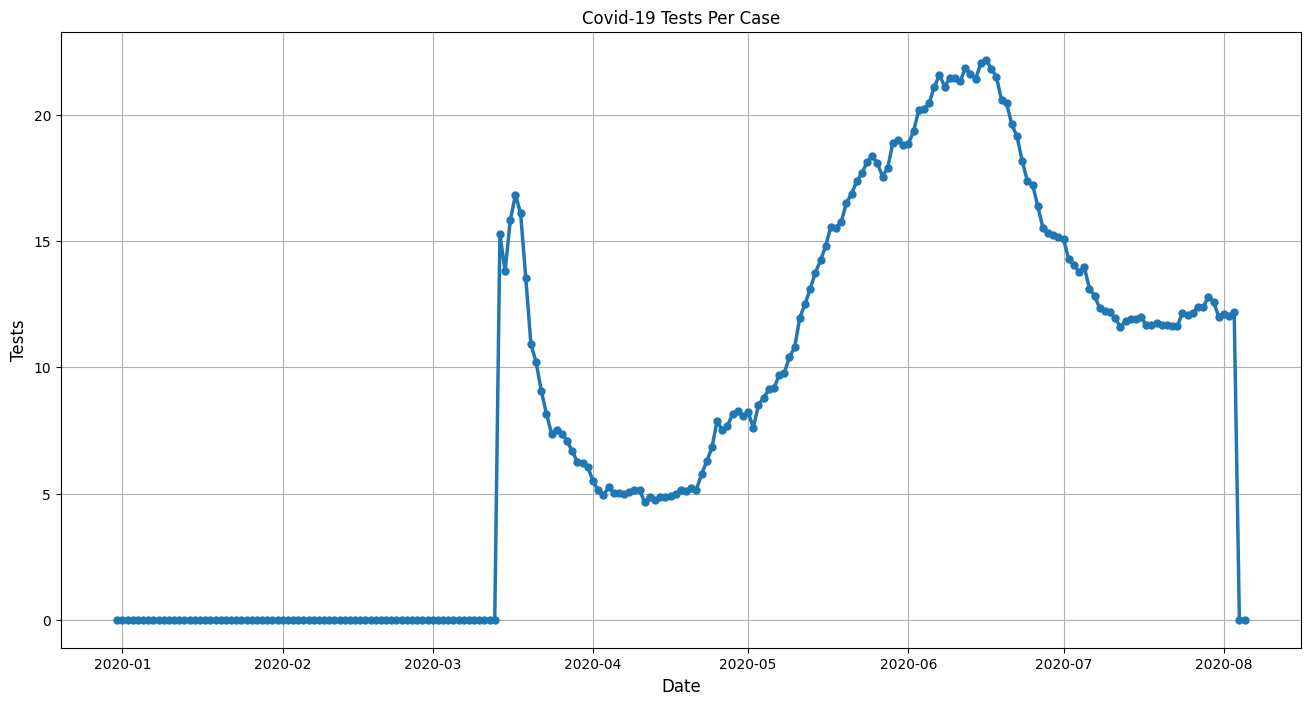

In [ ]:
fig, ax = plt.subplots(figsize = (16,8))


marker_style = dict(linewidth=2.5, linestyle = '-', marker = 'o', markersize = 5)
ax.plot(testing['date'], testing['tests_per_case'], **marker_style)

#labels
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Tests', fontsize = 12)
plt.title('Covid-19 Tests Per Case')

#formatting
ax.xaxis.set_major_locator(months)
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x
ax.grid(True)

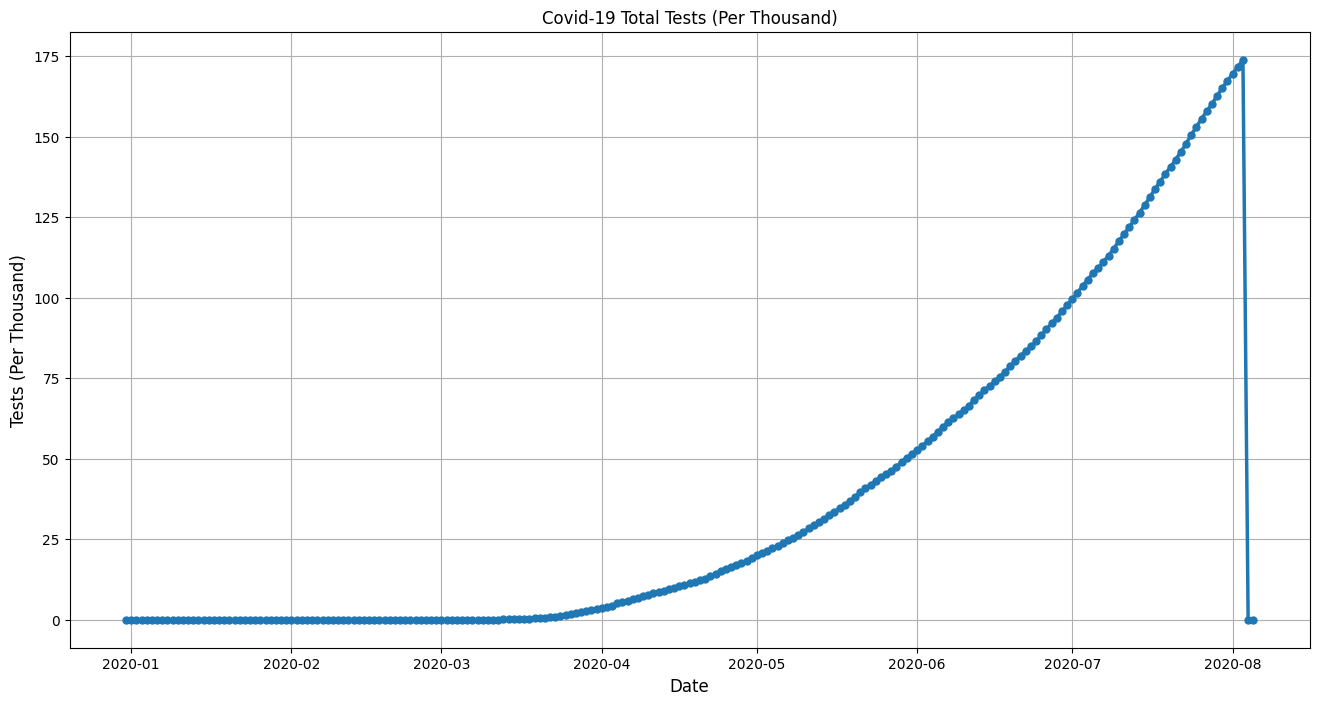

In [ ]:
fig, ax = plt.subplots(figsize = (16,8))


marker_style = dict(linewidth=2.5, linestyle = '-', marker = 'o', markersize = 5)
ax.plot(testing['date'], testing['total_tests_per_thousand'], **marker_style)

#labels
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Tests (Per Thousand)', fontsize = 12)
plt.title('Covid-19 Total Tests (Per Thousand)')

#formatting
ax.xaxis.set_major_locator(months)
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x
ax.grid(True)

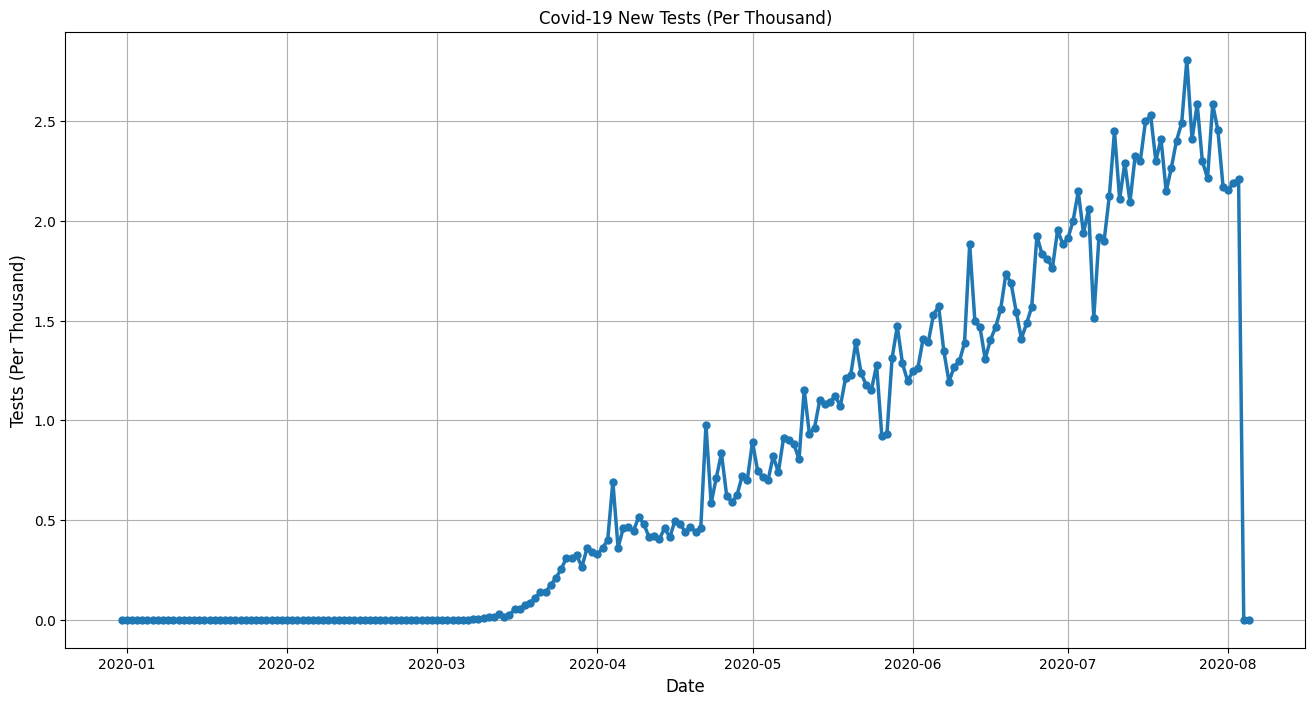

In [ ]:
fig, ax = plt.subplots(figsize = (16,8))


marker_style = dict(linewidth=2.5, linestyle = '-', marker = 'o', markersize = 5)
ax.plot(testing['date'], testing['new_tests_per_thousand'], **marker_style)

#labels
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Tests (Per Thousand)', fontsize = 12)
plt.title('Covid-19 New Tests (Per Thousand)')

#formatting
ax.xaxis.set_major_locator(months)
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x
ax.grid(True)

### Predictive Modeling

### Prophet

We will be using the open source software Prophet to forecast future Covid-19 cases. It provides reliable predictions as it is robust to shifts in the data and handles outliers. Our model for forecasting confirmed cases, deaths and recovered patients will be relatively straightforward as the data follows a polynomial trend.

### Cases

In [ ]:
confirmed = pd.DataFrame(cases_by_date)

confirmed.tail()

,cases
date,
2020-08-04,4778669
2020-08-05,4832395
2020-08-06,4889733
2020-08-07,4950708
2020-08-08,5005904


In [ ]:
#clean dataframe for usability with prophet.
confirmed.reset_index(level=0, inplace=True)
confirmed.columns = ['ds', 'y']

In [ ]:
#setting up the model to predict 10 days ahead.
model = Prophet(interval_width = 0.95)
model.fit(confirmed)
future = model.make_future_dataframe(periods=10)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2b1mshk/nuqe_qo7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2b1mshk/a__a2vik.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2434', 'data', 'file=/tmp/tmpz2b1mshk/nuqe_qo7.json', 'init=/tmp/tmpz2b1mshk/a__a2vik.json', 'output', 'file=/tmp/tmpz2b1mshk/prophet_modelgdn5onyv/prophet_model-20240329165049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:50:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:50:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#predicting future forecast with date.
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
201,2020-08-09,5.088108e+06,5.061117e+06,5.117030e+06
202,2020-08-10,5.146887e+06,5.117816e+06,5.175719e+06
203,2020-08-11,5.207428e+06,5.178792e+06,5.235583e+06
204,2020-08-12,5.269116e+06,5.239025e+06,5.299303e+06
205,2020-08-13,5.332284e+06,5.297451e+06,5.366769e+06
206,2020-08-14,5.396716e+06,5.355504e+06,5.431851e+06
207,2020-08-15,5.458971e+06,5.411420e+06,5.504089e+06
208,2020-08-16,5.519159e+06,5.461193e+06,5.574885e+06
209,2020-08-17,5.577939e+06,5.514568e+06,5.636015e+06
210,2020-08-18,5.638479e+06,5.565339e+06,5.705972e+06


In the table above, yhat signifies the predicted value while both lower and upper columns refer to the bounds. This is treated as a 95% confidence interval and thus there is 95% certainty that the given value will be between these upper and lower bounds.

In [ ]:
pred_cases = forecast[['ds', 'yhat']]
#pred_cases['ds'] = pd.to_datetime(pred_cases['ds'])
pred_cases.set_index('ds', inplace=True)

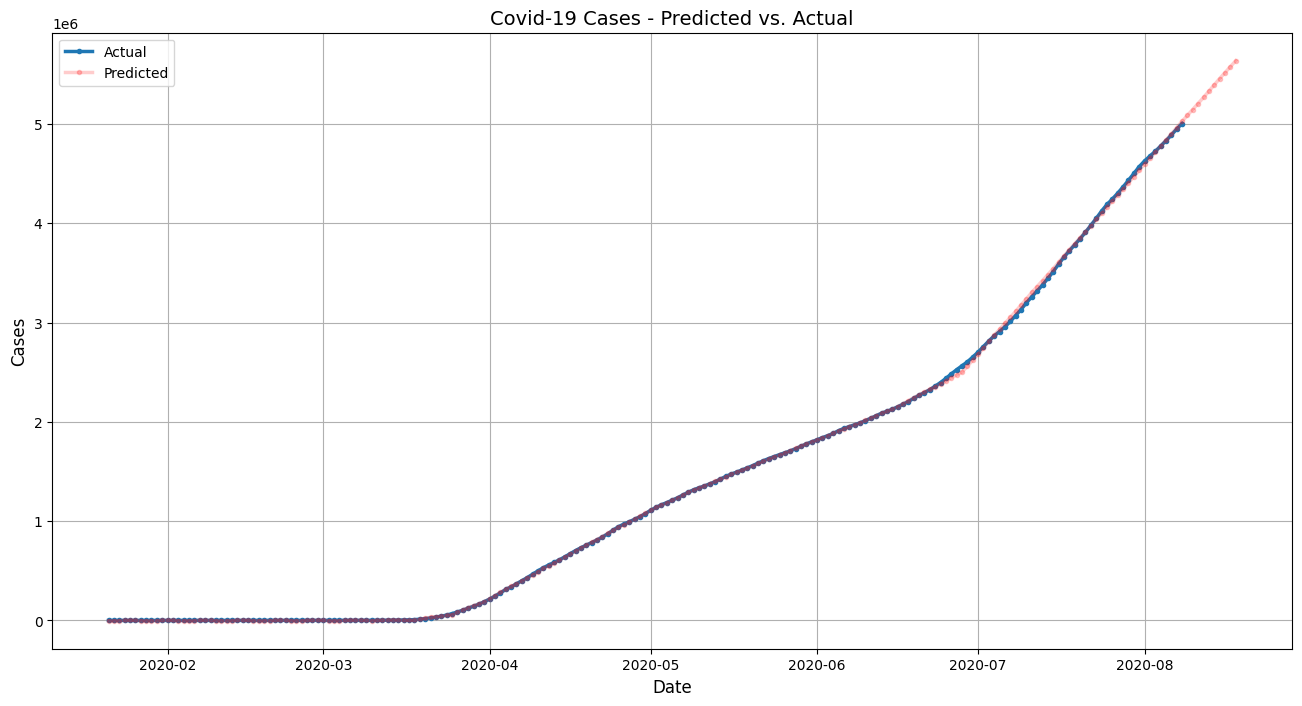

In [ ]:
#Prediction plot (cases) + 10 days.

fig, ax = plt.subplots(figsize = (16,8))
marker_style = dict(linewidth=2.5, marker = 'o', markersize = 3)
ax.plot(cases_by_date, **marker_style, linestyle = '-', label = 'Actual')
ax.plot(pred_cases, **marker_style, linestyle = '-', label = 'Predicted', color = 'r', alpha =0.2)
plt.ylabel("Cases", fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.title('Covid-19 Cases - Predicted vs. Actual', fontsize = 14)
ax.legend(loc='upper left')

#ax.patch.set_facecolor('grey')
#ax.patch.set_alpha(0.2)

#Format ticks
ax.xaxis.set_major_locator(months)
ax.grid(True)

plt.show()

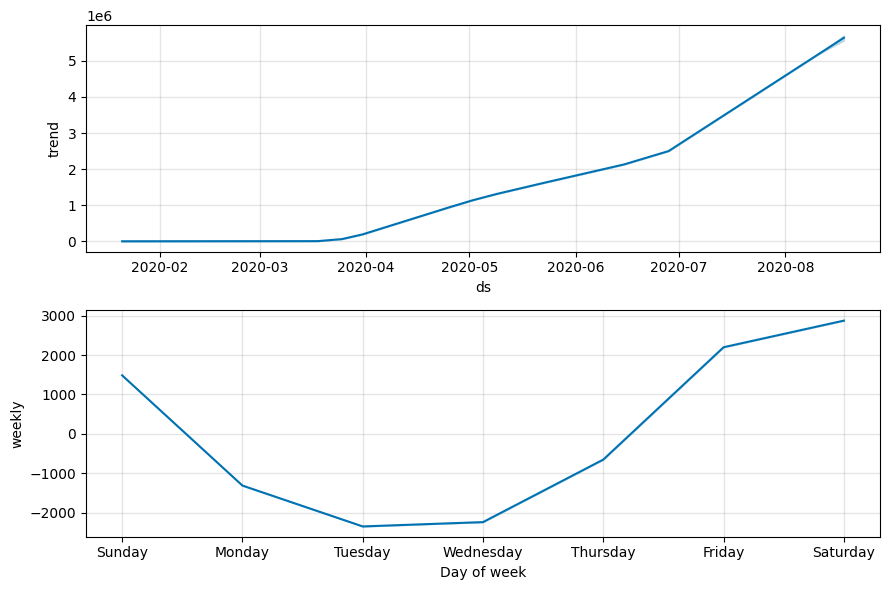

In [ ]:
conf_comp_plot = model.plot_components(forecast)

In [ ]:
deaths = pd.DataFrame(deaths_by_date)
deaths.reset_index(level=0, inplace=True)
deaths.columns = ['ds', 'y']

In [ ]:
model = Prophet(interval_width = 0.95)
model.fit(deaths)
future = model.make_future_dataframe(periods=10)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2b1mshk/0ov6160p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2b1mshk/xffth0_t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71122', 'data', 'file=/tmp/tmpz2b1mshk/0ov6160p.json', 'init=/tmp/tmpz2b1mshk/xffth0_t.json', 'output', 'file=/tmp/tmpz2b1mshk/prophet_modelxfrwn5a1/prophet_model-20240329165110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:51:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:51:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
201,2020-08-09,160132.268899,158783.433064,161458.997456
202,2020-08-10,160814.175051,159424.483294,162198.060398
203,2020-08-11,161873.989281,160451.789944,163268.736604
204,2020-08-12,162903.248612,161401.656119,164466.880551
205,2020-08-13,163899.589575,162172.000005,165474.405440
206,2020-08-14,164833.978538,162745.656569,166780.646317
207,2020-08-15,165643.521681,163600.367353,167731.756095
208,2020-08-16,166136.567446,163660.353142,168823.062805
209,2020-08-17,166818.473598,164231.489450,169796.222652
210,2020-08-18,167878.287829,164469.572456,171362.723467


In [ ]:
pred_deaths = forecast[['ds', 'yhat']]
#pred_cases['ds'] = pd.to_datetime(pred_cases['ds'])
pred_deaths.set_index('ds', inplace=True)

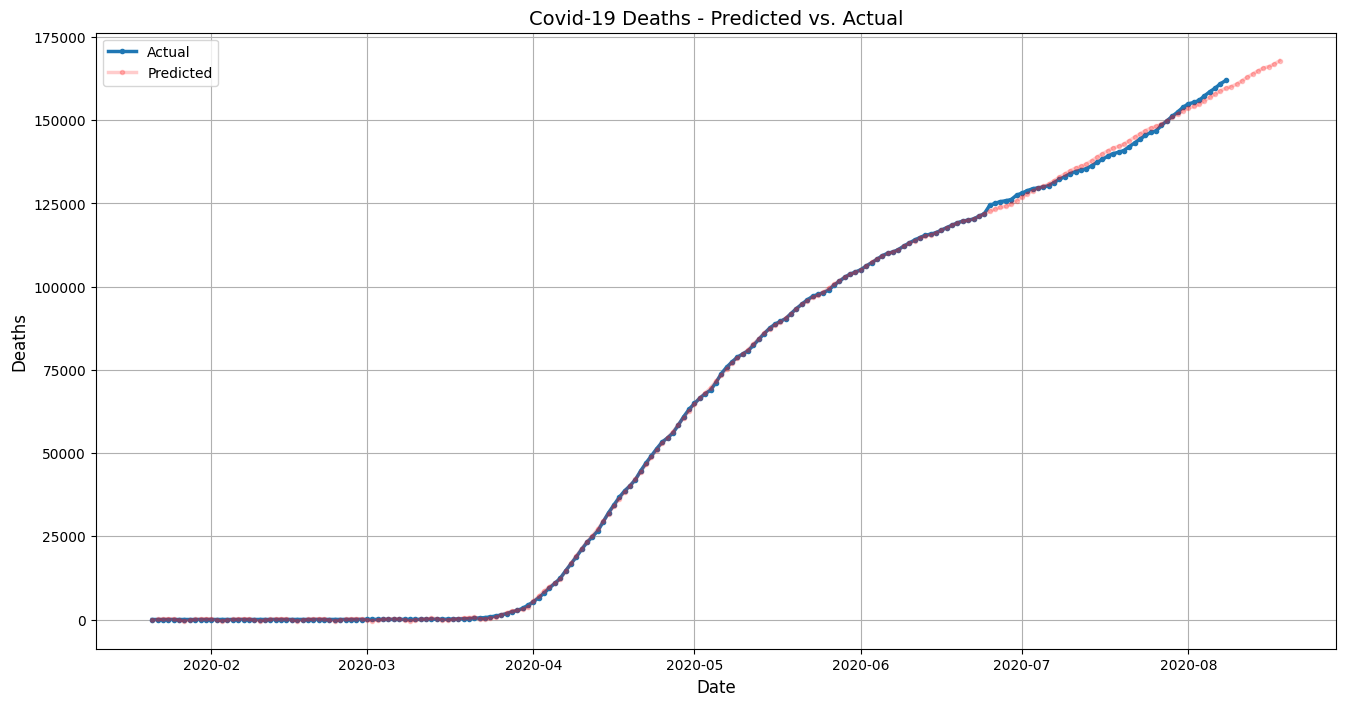

In [ ]:
#Prediction plot (deaths) + 10 days.

fig, ax = plt.subplots(figsize = (16,8))
marker_style = dict(linewidth=2.5, marker = 'o', markersize = 3)
ax.plot(deaths_by_date, **marker_style, linestyle = '-', label = 'Actual')
ax.plot(pred_deaths, **marker_style, linestyle = '-', label = 'Predicted', color = 'r', alpha =0.2)
plt.ylabel("Deaths", fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.title('Covid-19 Deaths - Predicted vs. Actual', fontsize = 14)
ax.legend(loc='upper left')

#ax.patch.set_facecolor('grey')
#ax.patch.set_alpha(0.2)

#Format ticks
ax.xaxis.set_major_locator(months)
ax.grid(True)

plt.show()

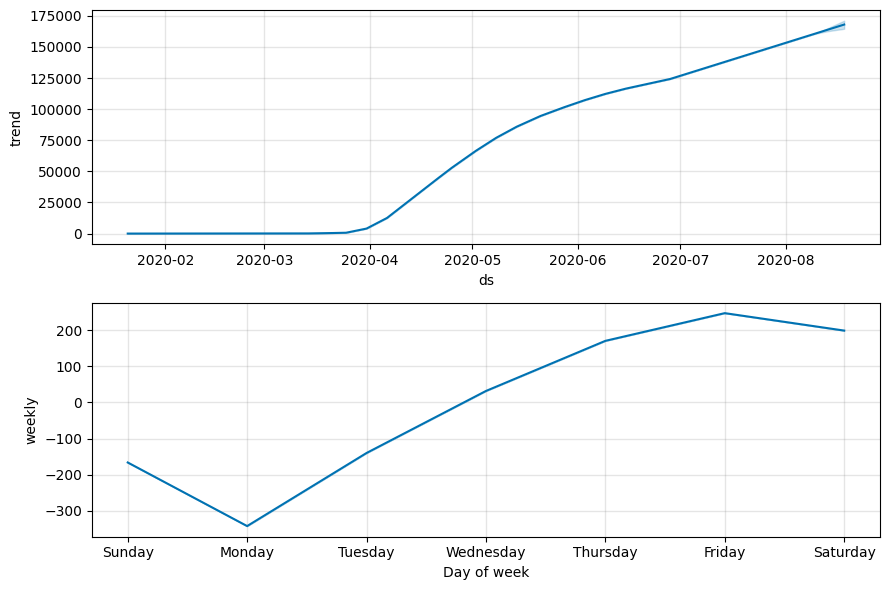

In [ ]:
deaths_comp_plot = model.plot_components(forecast)

In [ ]:
recovered = pd.DataFrame(recovered)
recovered.reset_index(level=0, inplace=True)
recovered.columns = ['ds', 'y']

In [ ]:
model = Prophet(interval_width = 0.95)
model.fit(recovered)
future = model.make_future_dataframe(periods=10)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2b1mshk/ygvhp0qw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2b1mshk/6jtvno3i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31744', 'data', 'file=/tmp/tmpz2b1mshk/ygvhp0qw.json', 'init=/tmp/tmpz2b1mshk/6jtvno3i.json', 'output', 'file=/tmp/tmpz2b1mshk/prophet_model32gswcgh/prophet_model-20240329165131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:51:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:51:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
200,2020-08-09,1.633854e+06,1.609258e+06,1.658562e+06
201,2020-08-10,1.658766e+06,1.633960e+06,1.683941e+06
202,2020-08-11,1.678781e+06,1.654178e+06,1.702762e+06
203,2020-08-12,1.701446e+06,1.674909e+06,1.726541e+06
204,2020-08-13,1.723798e+06,1.697936e+06,1.747420e+06
205,2020-08-14,1.746515e+06,1.722348e+06,1.773270e+06
206,2020-08-15,1.771230e+06,1.744156e+06,1.798378e+06
207,2020-08-16,1.789857e+06,1.762386e+06,1.819819e+06
208,2020-08-17,1.814768e+06,1.784960e+06,1.845693e+06
209,2020-08-18,1.834784e+06,1.802584e+06,1.864633e+06


In [ ]:
pred_recovered = forecast[['ds', 'yhat']]
#pred_cases['ds'] = pd.to_datetime(pred_cases['ds'])
pred_recovered.set_index('ds', inplace=True)

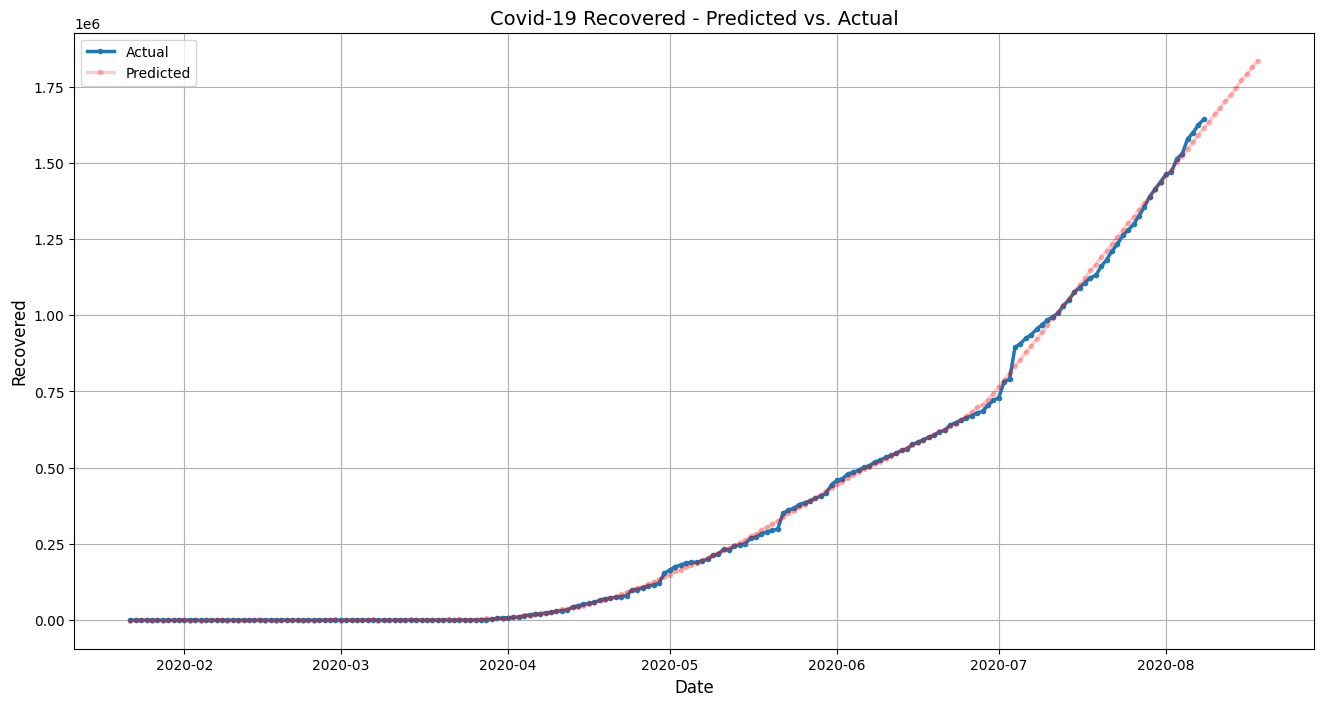

In [ ]:
#Prediction plot (deaths) + 10 days.

fig, ax = plt.subplots(figsize = (16,8))
marker_style = dict(linewidth=2.5, marker = 'o', markersize = 3)
ax.plot(recovered_by_date, **marker_style, linestyle = '-', label = 'Actual')
ax.plot(pred_recovered, **marker_style, linestyle = '-', label = 'Predicted', color = 'r', alpha =0.2)
plt.ylabel("Recovered", fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.title('Covid-19 Recovered - Predicted vs. Actual', fontsize = 14)
ax.legend(loc='upper left')

#ax.patch.set_facecolor('grey')
#ax.patch.set_alpha(0.2)

#Format ticks
ax.xaxis.set_major_locator(months)
ax.grid(True)

plt.show()

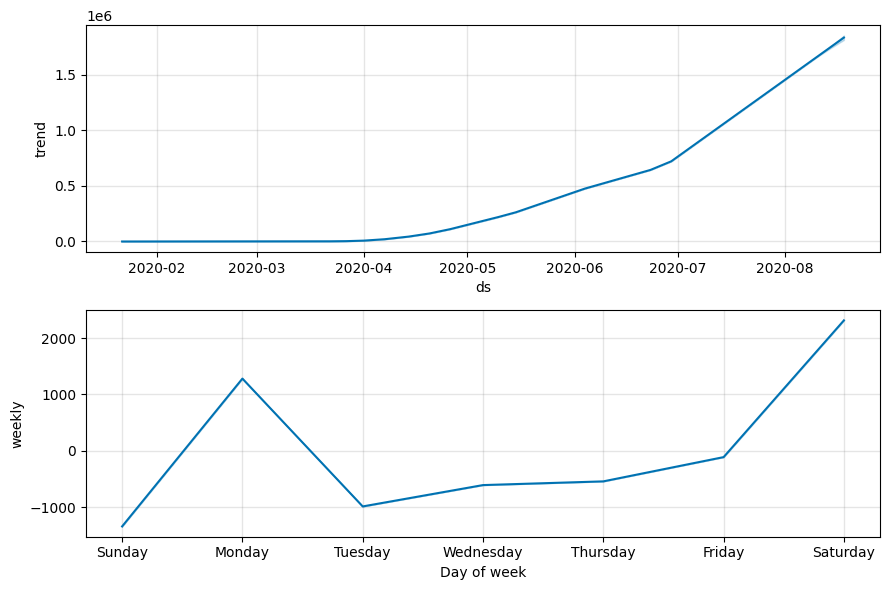

In [ ]:
recovered_comp_plot = model.plot_components(forecast)